**Kidney Disease Prediction**

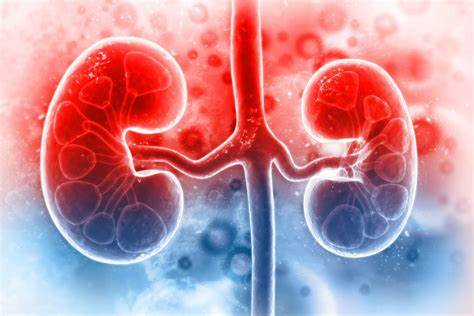

**Objective**
Our main goal for creating this prototype is to improve the early and affordable detection of kidney-related diseases using Supervised Machine Learning.

In [76]:
#importing the libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [77]:
# assigning our data to a dataframe
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/kidney_disease.csv')

# Display the first few rows of the DataFrame
df.head()


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [78]:
# displaying the shape of our data
df.shape

(400, 26)

In [79]:
# Here we are dropping the ID column, which is just a data entry and does not have any logical connection to the output.
df.drop('id', axis=1, inplace=True)

In [80]:
# Re-nameing columns to their full name.
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'pedal_edema',
              'anemia', 'class']

In [81]:
# again looking at data after modification
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [82]:
# Displaying the statistics summery of our dataset
df.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [83]:
# looking at the data type of our columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [84]:
# Checking for null values
df.isnull().sum().sort_values(ascending=False)


red_blood_cells            152
red_blood_cell_count       130
white_blood_cell_count     105
potassium                   88
sodium                      87
packed_cell_volume          70
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
class                        0
dtype: int64

In [85]:
# the data set contains higher number of null values for now we are going to drop the row which contains null values
# and check for the corelation for the columns
df.dropna(inplace=True)

In [86]:
df.isnull().sum()

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
haemoglobin                0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
class                      0
dtype: int64

In [87]:
# after dropping down the null values the data has decreased significantly
df.shape

(158, 25)

In [88]:
# here we are looking at unique values in columns
for i in df.columns:
    if df[i].dtypes == 'O':
        print(f'Number of unique values in {i} is {len(df[i].unique())}')
        print(df[i].unique())

Number of unique values in red_blood_cells is 2
['normal' 'abnormal']
Number of unique values in pus_cell is 2
['abnormal' 'normal']
Number of unique values in pus_cell_clumps is 2
['present' 'notpresent']
Number of unique values in bacteria is 2
['notpresent' 'present']
Number of unique values in packed_cell_volume is 34
['32' '29' '16' '24' '37' '33' '28' '36' '22' '40' '52' '30' '35' '23'
 '25' '39' '26' '20' '31' '34' '9' '48' '46' '42' '49' '41' '44' '45' '43'
 '50' '51' '47' '53' '54']
Number of unique values in white_blood_cell_count is 71
['6700' '12100' '4500' '11000' '9200' '6900' '9600' '18900' '7200' '14600'
 '6400' '\t6200' '3800' '9800' '12500' '5600' '7000' '15200' '5000'
 '16300' '\t8400' '10500' '7900' '10900' '12800' '12400' '19100' '7500'
 '16700' '26400' '8800' '7400' '12000' '15700' '11500' '10200' '5400'
 '10400' '9100' '6200' '8300' '10700' '8400' '4300' '9400' '8600' '6800'
 '9500' '9000' '4700' '6300' '5800' '5500' '5300' '7100' '8200' '8100'
 '7800' '7300' '77

In [89]:
# we found some data of white_blood_cell_count contains '\t' on their data so we gonna remove it
count_aa_rows = df[df['white_blood_cell_count'].str.contains('\t6200')].shape[0]
print("Number of rows containing '\t6200':", count_aa_rows)

Number of rows containing '	6200': 1


In [90]:
count_aa_rows = df[df['white_blood_cell_count'].str.contains('\t8400')].shape[0]
print("Number of rows containing '\t8400':", count_aa_rows)

Number of rows containing '	8400': 1


In [91]:
df['white_blood_cell_count'] = df['white_blood_cell_count'].str.replace('\t6200', '6200')

In [92]:
df['white_blood_cell_count'] = df['white_blood_cell_count'].str.replace('\t8400', '8400')

In [93]:
# changing the string columns to float as it should be in float
df['white_blood_cell_count'] = df[['white_blood_cell_count']].astype(float)
df['packed_cell_volume'] = df[['packed_cell_volume']].astype(float)
df['red_blood_cell_count'] = df[['red_blood_cell_count']].astype(float)

In [94]:
# using labelEncoder for object type columns, as for the training model, we need data in numerical values.

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Iterate through DataFrame columns and encode object-type columns
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = le.fit_transform(df[i])



In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 3 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      158 non-null    float64
 1   blood_pressure           158 non-null    float64
 2   specific_gravity         158 non-null    float64
 3   albumin                  158 non-null    float64
 4   sugar                    158 non-null    float64
 5   red_blood_cells          158 non-null    int64  
 6   pus_cell                 158 non-null    int64  
 7   pus_cell_clumps          158 non-null    int64  
 8   bacteria                 158 non-null    int64  
 9   blood_glucose_random     158 non-null    float64
 10  blood_urea               158 non-null    float64
 11  serum_creatinine         158 non-null    float64
 12  sodium                   158 non-null    float64
 13  potassium                158 non-null    float64
 14  haemoglobin              1

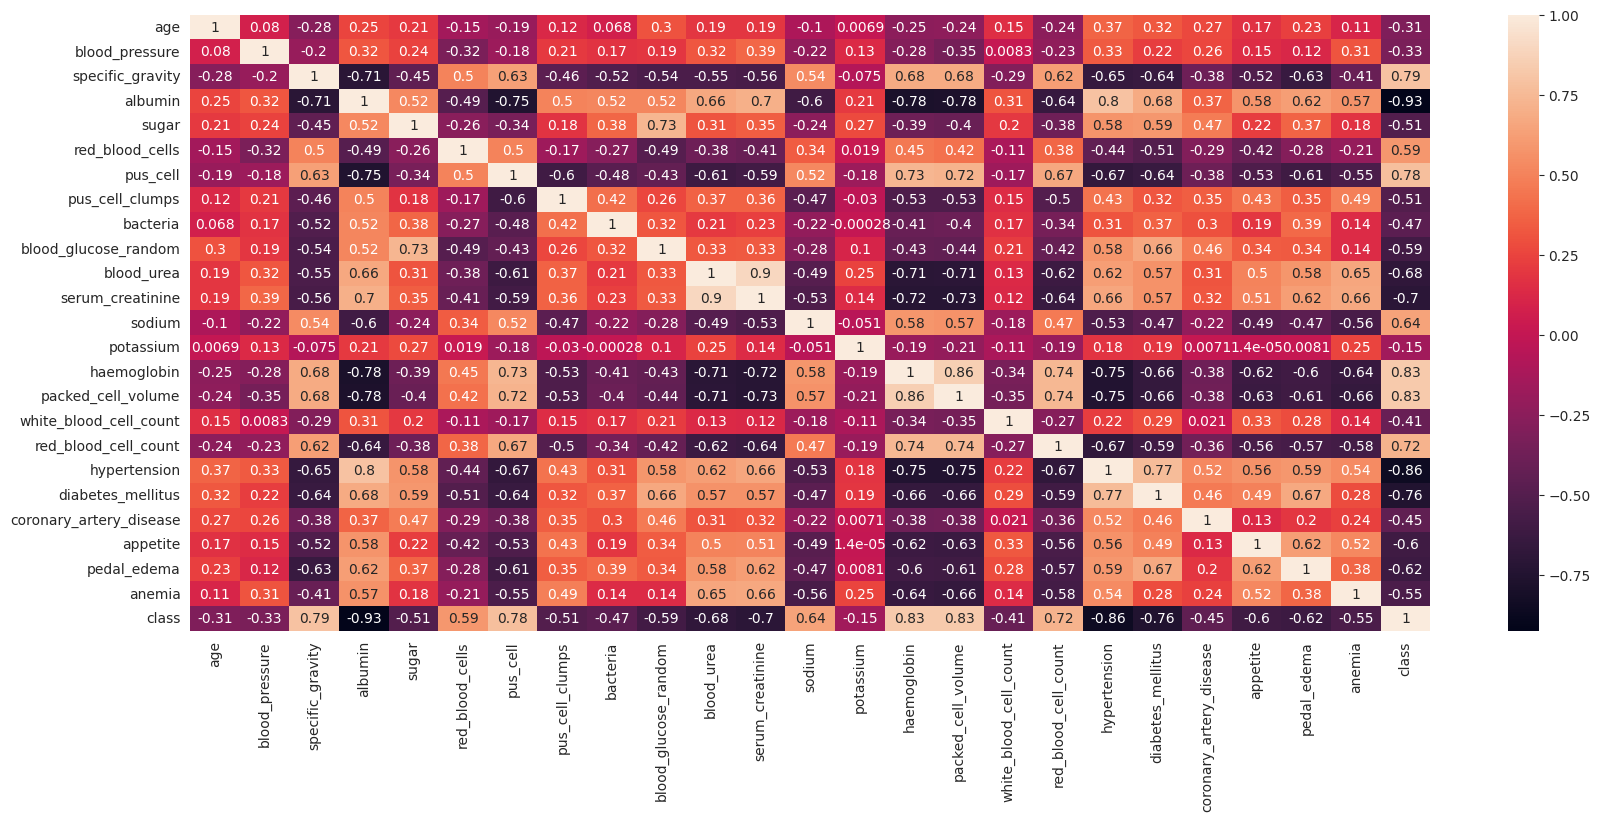

In [96]:
# Now here we are waiting for correlation between columns.

corr=df.corr()
plt.figure(figsize=(20,8))
sns.heatmap(corr,annot=True)
plt.show()

In [97]:
# looking specially at class column corelation
corr_matrix = df.corr()
corr_matrix['class'].sort_values(ascending=False)

class                      1.000000
haemoglobin                0.833790
packed_cell_volume         0.827983
specific_gravity           0.790102
pus_cell                   0.775388
red_blood_cell_count       0.719978
sodium                     0.640902
red_blood_cells            0.586391
potassium                 -0.153565
age                       -0.305119
blood_pressure            -0.326567
white_blood_cell_count    -0.407570
coronary_artery_disease   -0.447355
bacteria                  -0.468845
pus_cell_clumps           -0.509915
sugar                     -0.510615
anemia                    -0.548947
blood_glucose_random      -0.591217
appetite                  -0.604622
pedal_edema               -0.622573
blood_urea                -0.677611
serum_creatinine          -0.702206
diabetes_mellitus         -0.758965
hypertension              -0.856334
albumin                   -0.925816
Name: class, dtype: float64

In [98]:
# as from above heatmap diageam we found that potassium -15% co-relation with class which is very low
# and doesn't effect on output so we are going to remove it and after analysis red_blood_cells which consist (normal and abnormal)
# and there is also column called red_blood_cell_count so we dont required red_blood_cells column so we gonna remove it too
# packed_cell_volume has 86% co-relation to haemoglobin which means this two are strongly co-related to each other
# so we can drop one of them we chose packed_cell_volume cause it contained more number of null values

# from above we have droped some rows which contains null values in packed_cell_volume, potassium, red_blood_cells which is our data loss
# So we are going to do the data cleaning process from the beginning.

In [99]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/kidney_disease.csv')

Initially in the above , we identified the key columns of interest. Then, we examined the dataset for any missing values, and we discovered that some columns had missing data, resulting in data loss. Consequently, we decided to remove these problematic columns and proceeded to re-import the data.

In [100]:
df.drop('id', axis=1, inplace=True)

In [101]:
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'pedal_edema',
              'anemia', 'class']

In [102]:
# dropping down unnessery columns

df.drop('red_blood_cells', axis=1, inplace=True)
df.drop('potassium', axis=1, inplace=True)
df.drop('packed_cell_volume', axis=1, inplace=True)


In [103]:
# Checking for null values
df.isnull().sum().sort_values(ascending=False)

red_blood_cell_count       130
white_blood_cell_count     105
sodium                      87
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
class                        0
dtype: int64

In [104]:
df.dropna(inplace=True)

In [105]:
df.shape

(189, 22)

In [106]:
# so as from above process we got 158 data now after dropping unnessary columns and re-checking null values we got 189 data which is good

In [107]:
for i in df.columns:
    if df[i].dtypes == 'O':
        print(f'Number of unique values in {i} is {len(df[i].unique())}')
        print(df[i].unique())

Number of unique values in pus_cell is 2
['abnormal' 'normal']
Number of unique values in pus_cell_clumps is 2
['present' 'notpresent']
Number of unique values in bacteria is 2
['notpresent' 'present']
Number of unique values in white_blood_cell_count is 75
['6700' '12100' '4500' '12200' '11000' '3800' '11400' '9200' '6900' '8400'
 '10300' '9600' '7800' '6400' '18900' '7200' '7700' '8300' '14600'
 '\t6200' '7100' '9400' '9800' '12500' '5600' '7000' '11900' '9100'
 '10700' '6800' '10200' '9000' '8200' '15200' '5000' '16300' '\t8400'
 '10500' '7900' '10900' '8100' '12800' '12400' '19100' '5800' '7500'
 '16700' '26400' '8800' '7400' '12000' '15700' '4200' '11500' '5400'
 '10400' '6200' '4300' '8600' '9500' '4700' '6300' '5500' '5300' '7300'
 '9900' '5200' '6000' '9300' '6500' '8000' '9700' '5100' '5700' '6600']
Number of unique values in red_blood_cell_count is 44
['3.9' '3.7' '3.8' '3.4' '2.6' '2.8' '4.3' '3.2' '4' '4.1' '4.0' '4.5'
 '4.7' '3.5' '5.2' '2.1' '4.2' '5.6' '3.6' '2.9' '2.7' 

In [108]:
df['white_blood_cell_count'] = df['white_blood_cell_count'].str.replace('\t6200', '6200')
df['white_blood_cell_count'] = df['white_blood_cell_count'].str.replace('\t8400', '8400')

In [109]:
le = LabelEncoder()

# Iterate through DataFrame columns and encode object-type columns
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = le.fit_transform(df[i])

In [110]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,...,haemoglobin,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
3,48.0,70.0,1.005,4.0,0.0,0,1,0,117.0,56.0,...,11.2,44,15,1,0,0,1,1,1,0
9,53.0,90.0,1.020,2.0,0.0,0,1,0,70.0,107.0,...,9.5,11,13,1,1,0,1,0,1,0
11,63.0,70.0,1.010,3.0,0.0,0,1,0,380.0,60.0,...,10.8,27,14,1,1,0,1,1,0,0
12,68.0,70.0,1.015,3.0,1.0,1,1,0,208.0,72.0,...,9.7,12,10,1,1,1,1,1,0,0
14,68.0,80.0,1.010,3.0,2.0,0,1,1,157.0,90.0,...,5.6,6,2,1,1,1,1,1,0,0


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189 entries, 3 to 399
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      189 non-null    float64
 1   blood_pressure           189 non-null    float64
 2   specific_gravity         189 non-null    float64
 3   albumin                  189 non-null    float64
 4   sugar                    189 non-null    float64
 5   pus_cell                 189 non-null    int64  
 6   pus_cell_clumps          189 non-null    int64  
 7   bacteria                 189 non-null    int64  
 8   blood_glucose_random     189 non-null    float64
 9   blood_urea               189 non-null    float64
 10  serum_creatinine         189 non-null    float64
 11  sodium                   189 non-null    float64
 12  haemoglobin              189 non-null    float64
 13  white_blood_cell_count   189 non-null    int64  
 14  red_blood_cell_count     1

In [112]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'pus_cell', 'pus_cell_clumps', 'bacteria', 'blood_glucose_random',
       'blood_urea', 'serum_creatinine', 'sodium', 'haemoglobin',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'class'],
      dtype='object')

In [113]:
# now we are going to visulise data through distplot from Seaborn

In [114]:
num_cols = [col for col in df.columns if df[col].dtype != 'object']

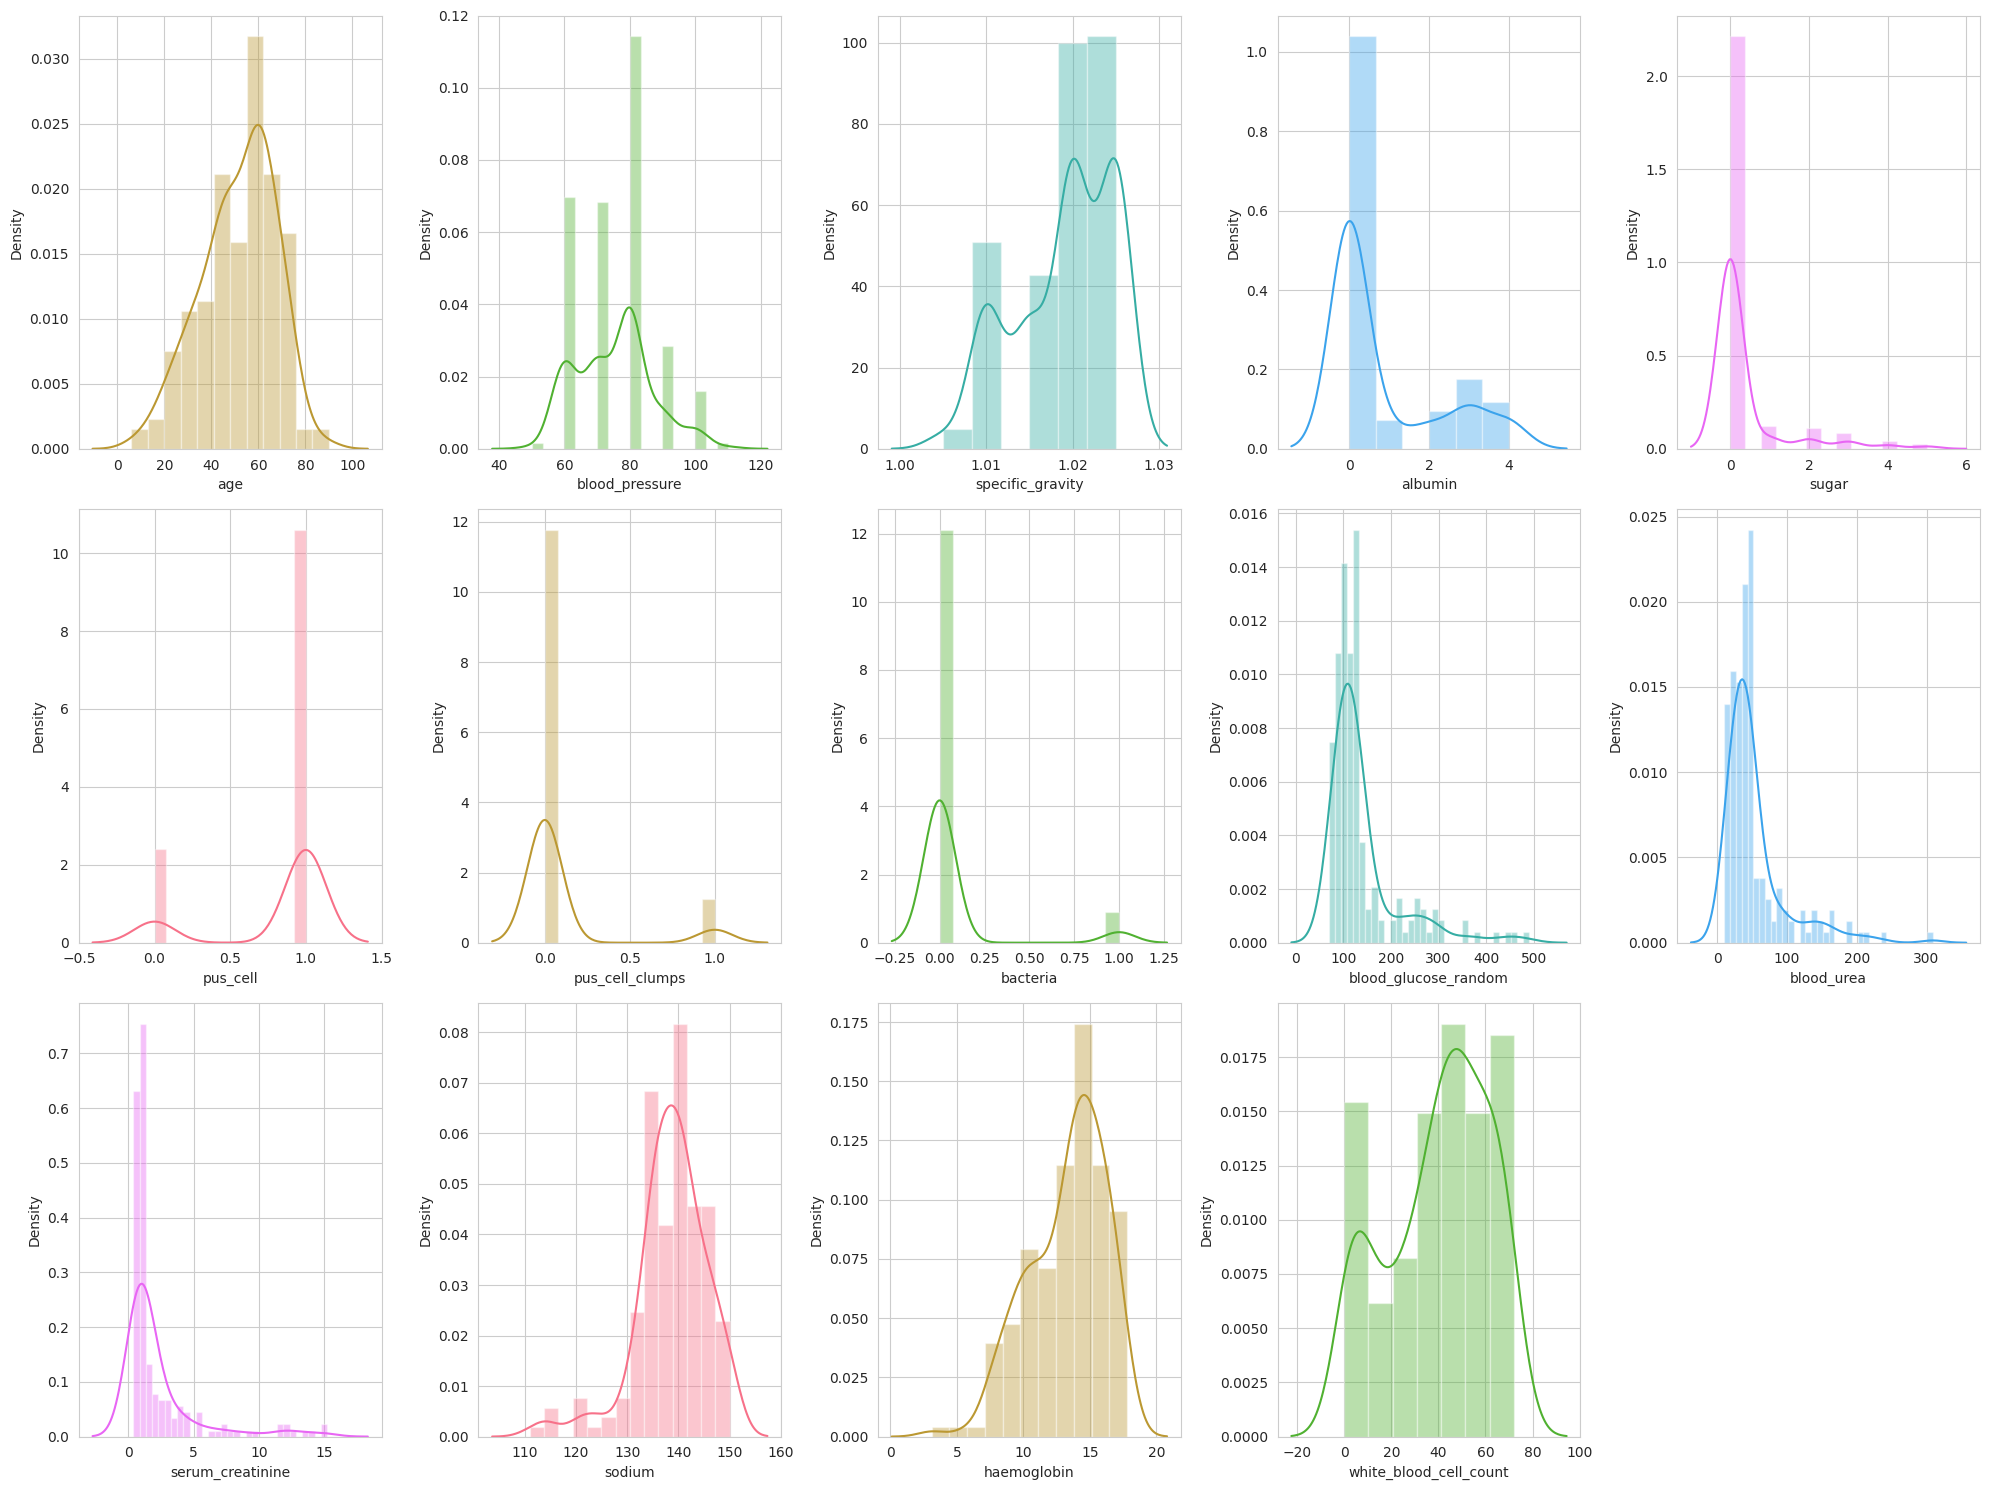

In [115]:
# Set a different style (e.g., 'whitegrid')
sns.set_style("whitegrid")

# Define a custom color palette
custom_palette = sns.color_palette("husl")

# Checking numerical features distribution with color and style changes
plt.figure(figsize=(20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column], color=custom_palette[plotnumber % len(custom_palette)])
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

# the above diagram to a graph where x is column data range and y is its density

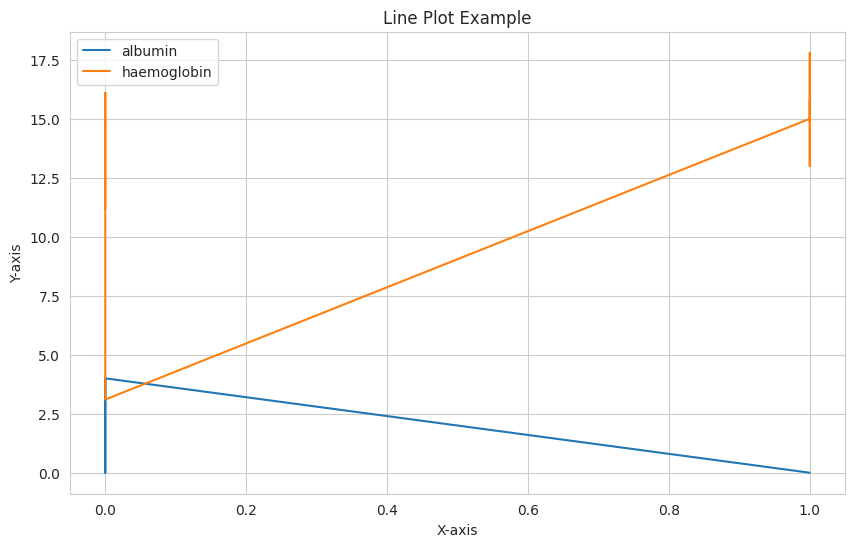

In [116]:
# this code shoes relation between class to albumin and haemoglobin which is through plot

plt.figure(figsize=(10, 6))
plt.plot(df['class'], df['albumin'], label='albumin')
plt.plot(df['class'], df['haemoglobin'], label='haemoglobin')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Line Plot Example')
plt.legend()  # Display legend based on the label

# Show the plot
plt.grid(True)  # Add grid for better readability
plt.show()

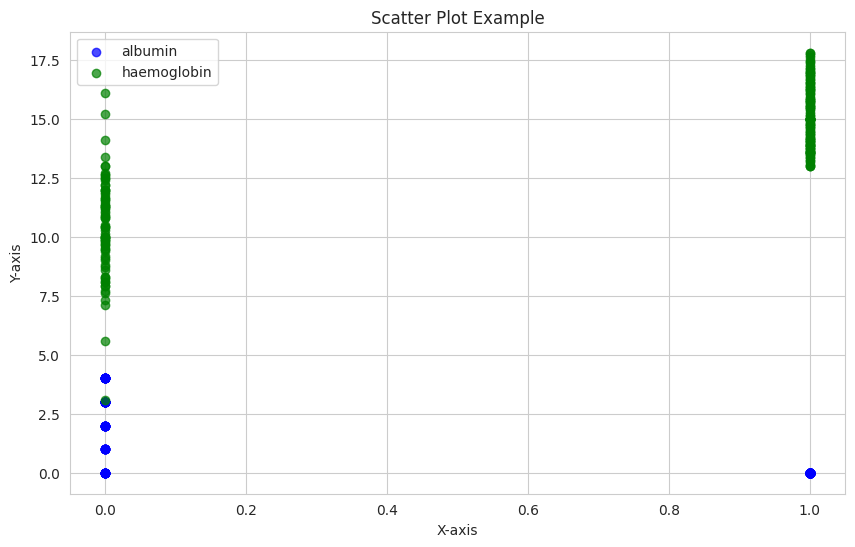

In [117]:
# this code shoes relation between class to albumin and haemoglobin which is through scatter

plt.figure(figsize=(10, 6))
plt.scatter(df['class'], df['albumin'], label='albumin', color='blue', alpha=0.7)
plt.scatter(df['class'], df['haemoglobin'], label='haemoglobin', color='green', alpha=0.7)

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot Example')
plt.legend()  # Display legend based on the label

# Show the plot
plt.grid(True)  # Add grid for better readability
plt.show()

In [118]:
# Data visulation through pandas_profiling

In [119]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Preparing metadata (setup.py) ... done


In [120]:
from pandas_profiling import ProfileReport
profile=ProfileReport(df,title="Complete Report Using Pandas Profiling")
profile.to_file('Chronic KIdney Disease Report')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [121]:
# now we will search for Outliers in our data and remove it if it got any

In [122]:
import matplotlib.pyplot as plt

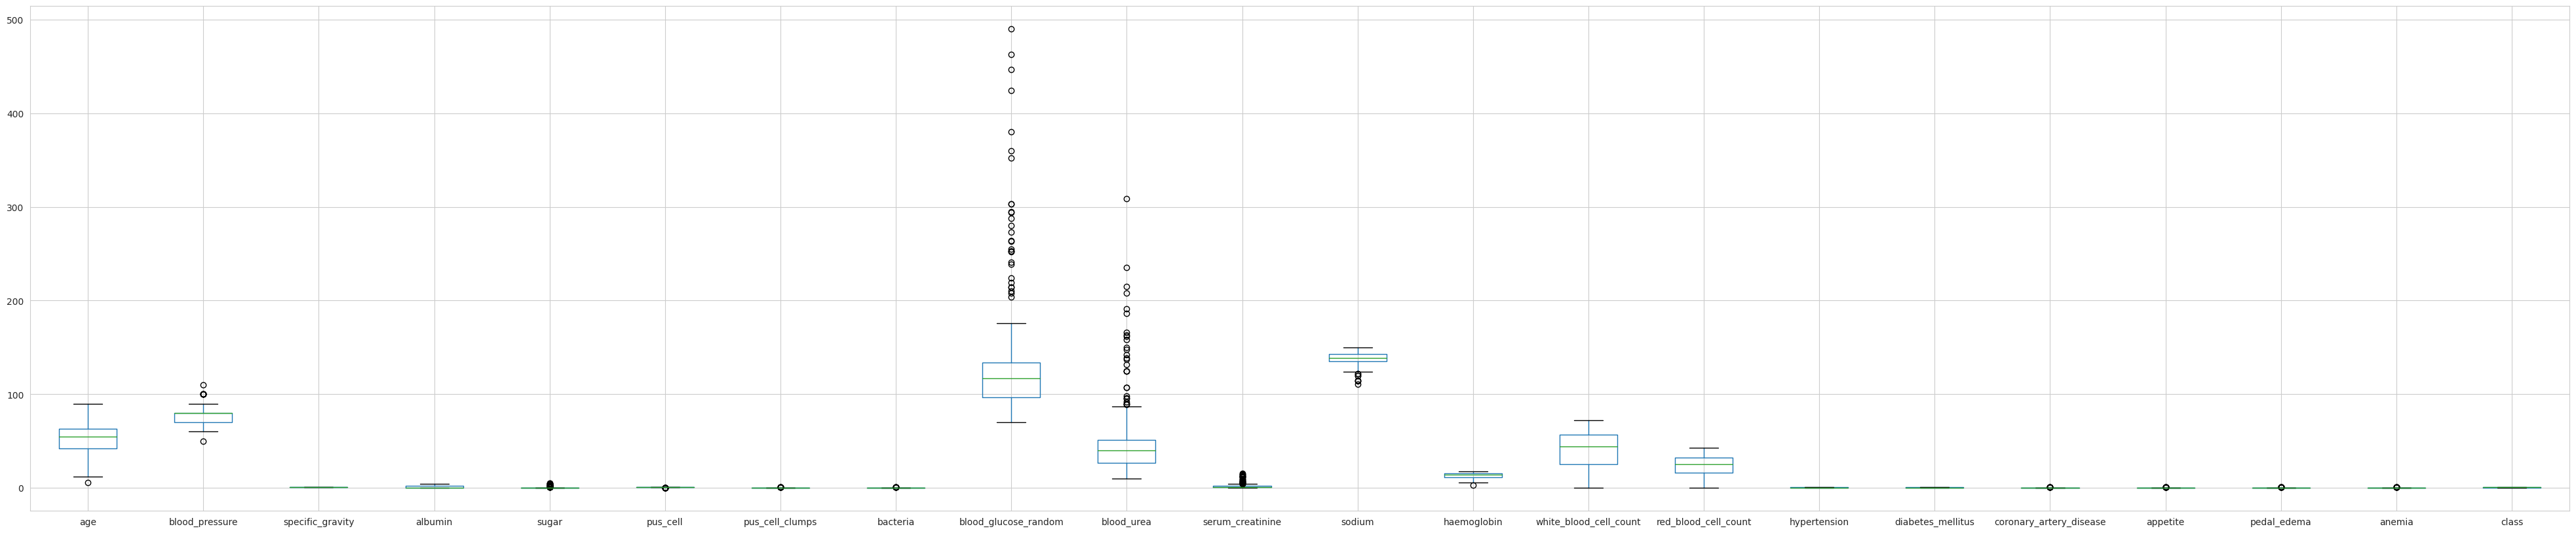

In [123]:

plt.figure(figsize=(50,10))
df.boxplot(figsize=(10,10))
plt.show()

In [124]:
# the above figure shows we got outliers in multiple columns

In [125]:
for i in df.columns:
  if(df[i].dtypes!='O'):
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    upper = q3+1.5*iqr
    lower = q1-1.5*iqr
    upperOutlier=len(df[df[i]>upper])
    lowerOutlier=len(df[df[i]<lower])
    if (upperOutlier>0):
      print(f'Total Number of upper outliers for {i} {upperOutlier}')

    if (lowerOutlier>0):
      print(f'Total Number of lower outliers for {i} {lowerOutlier}')

Total Number of lower outliers for age 1
Total Number of upper outliers for blood_pressure 11
Total Number of lower outliers for blood_pressure 1
Total Number of upper outliers for sugar 28
Total Number of lower outliers for pus_cell 35
Total Number of upper outliers for pus_cell_clumps 18
Total Number of upper outliers for bacteria 13
Total Number of upper outliers for blood_glucose_random 29
Total Number of upper outliers for blood_urea 28
Total Number of upper outliers for serum_creatinine 24
Total Number of lower outliers for sodium 8
Total Number of lower outliers for haemoglobin 1
Total Number of upper outliers for coronary_artery_disease 16
Total Number of upper outliers for appetite 27
Total Number of upper outliers for pedal_edema 26
Total Number of upper outliers for anemia 21


In [126]:
#  now we are going to remove the outliers

In [127]:
def removeOutlier(col):
  q1=df[col].quantile(0.25)
  q3=df[col].quantile(0.75)
  iqr=q3-q1
  df[col]=np.clip(df[col],q1-1.5*iqr,q3+1.5*iqr)

In [128]:
for i in df.columns:
  if(df[i].dtypes!='O'):
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    upper = q3+1.5*iqr
    lower = q1-1.5*iqr
    upperOutlier=len(df[df[i]>upper])
    lowerOutlier=len(df[df[i]<lower])
    if (upperOutlier !=0 or lowerOutlier !=0):
      removeOutlier(i)

In [129]:
df.shape

(189, 22)

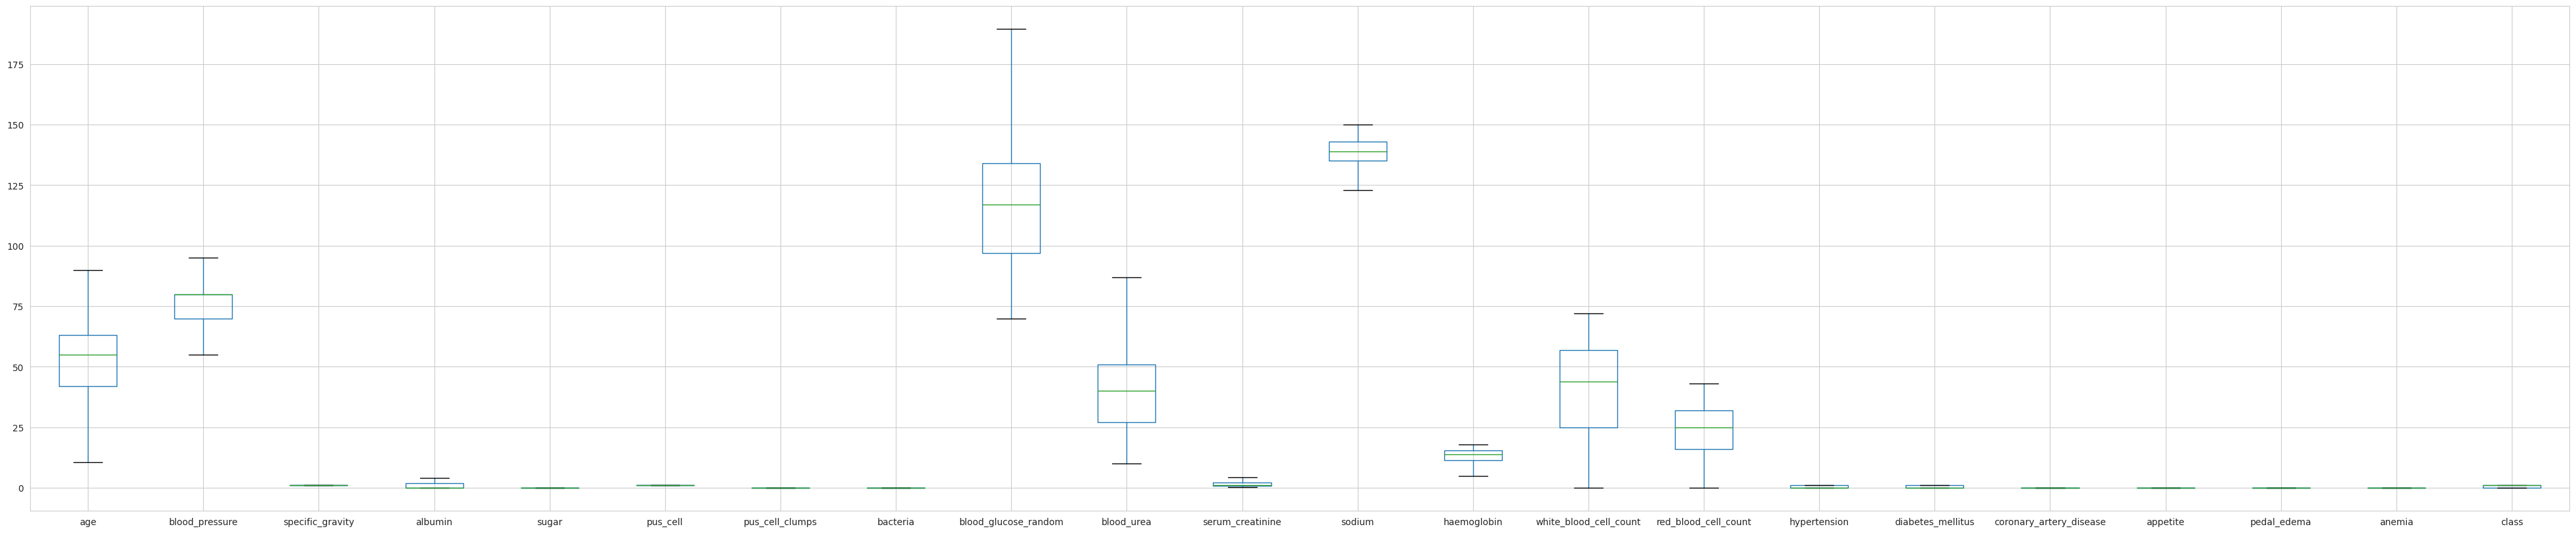

In [130]:
plt.figure(figsize=(50,10))
df.boxplot(figsize=(10,10))
plt.show()

In [131]:
# Assining x as input parimeter and y as output lable

In [132]:
from sklearn.model_selection import train_test_split
x=df.drop(columns='class')
y=df['class']

In [133]:
print(f'Shape of X Data : {x.shape}')
print(f'Shape of Y Data ":{y.shape}')

Shape of X Data : (189, 21)
Shape of Y Data ":(189,)


In [134]:
# importing some libraries for building models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.dummy import DummyClassifier


In [135]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [136]:
models=[]
models.append(('Logistic Regression',LogisticRegression()))
models.append(('Decision Tree',DecisionTreeClassifier()))
models.append(('svc',SVC(gamma='auto')))
models.append(('KNN',KNeighborsClassifier()))
models.append(('Dummy Classifier',DummyClassifier()))
models.append(('Ada Boost',AdaBoostClassifier()))
models.append(('Random Forest',RandomForestClassifier()))

In [137]:
# inesilizing k-fold and StratifiedKFold and spleating data into train and test

from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedKFold
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
# Define the number of splits for KFold and StratifiedKFold
n_splits = 20

kfold = KFold(n_splits=n_splits)
cv = StratifiedKFold(n_splits=n_splits)

x = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)


In [138]:
import joblib # for saving model

In [139]:
result={
    'Model Name':[],
    'Accuracy (TTS)':[],
    'Accuracy (Cross Fold)':[],
    'Accuracy (Stratified)':[]
}

In [140]:
# training models using regular method, Cross Fold method and Stratified Cross Fold method

In [141]:
for name,model in models:
  m=model
  m.fit(X_train,y_train)
  y_pred=m.predict(X_test)
  accuracy=accuracy_score(y_pred,y_test)
  print(name)
  print('-----------------------------------------------------------------------------')
  print(confusion_matrix(y_test,y_pred))
  print(classification_report(y_test,y_pred))
  score=cross_val_score(model,x,y,scoring='accuracy',cv=kfold)
  y_pred=model.predict(X_test)
  print(confusion_matrix(y_test,y_pred))
  print(classification_report(y_test,y_pred))
  stratifiedScore=cross_val_score(model,x,y,scoring='accuracy',cv=cv)
  y_pred=model.predict(X_test)
  print(confusion_matrix(y_test,y_pred))
  print(classification_report(y_test,y_pred))
  print('-----------------------------------------------------------------------------')
  result['Model Name'].append(name)
  result['Accuracy (TTS)'].append(accuracy)
  result['Accuracy (Cross Fold)'].append(score.mean())
  result['Accuracy (Stratified)'].append(stratifiedScore.mean())
  name2=name
  model_filename = f"{name2}_model.pkl"
  joblib.dump(m, model_filename)

Logistic Regression
-----------------------------------------------------------------------------
[[20  1]
 [ 0 17]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       0.94      1.00      0.97        17

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

[[20  1]
 [ 0 17]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       0.94      1.00      0.97        17

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

[[20  1]
 [ 0 17]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       0.94      1.00      0.97        17

    accuracy               

In [142]:
result=pd.DataFrame(result)

In [143]:
result

,Model Name,Accuracy (TTS),Accuracy (Cross Fold),Accuracy (Stratified)
0,Logistic Regression,0.973684,0.975,0.979444
1,Decision Tree,1.000000,0.985,0.984444
2,svc,0.447368,0.630,0.608889
3,KNN,0.842105,0.925,0.916111
4,Dummy Classifier,0.447368,0.630,0.608889
5,Ada Boost,1.000000,0.970,0.978889
6,Random Forest,1.000000,1.000,1.000000


In our analysis, we observed a strong correlation between our input columns and the output column, which significantly contributed to the excellent performance of our model. Specifically, our Random Forest model achieved an accuracy of 100%. This high accuracy can be attributed to the robustness and efficiency of the Random Forest algorithm, especially when dealing with highly correlated data. Consequently, the model was able to make precise predictions, resulting in the perfect accuracy score of 100%.

In [144]:
# here we are using gradio for web interface
!pip install gradio

In [145]:
import gradio as gr

In [146]:

def sepia(age, blood_pressure, specific_gravity, albumin, sugar,
       pus_cell, pus_cell_clumps, bacteria, blood_glucose_random,
       blood_urea, serum_creatinine, sodium, haemoglobin,
       white_blood_cell_count, red_blood_cell_count, hypertension,
       diabetes_mellitus, coronary_artery_disease, appetite,
       pedal_edema, anemia):
    x=np.array([[age, blood_pressure, specific_gravity, albumin, sugar,
       pus_cell, pus_cell_clumps, bacteria, blood_glucose_random,
       blood_urea, serum_creatinine, sodium, haemoglobin,
       white_blood_cell_count, red_blood_cell_count, hypertension,
       diabetes_mellitus, coronary_artery_disease, appetite,
       pedal_edema, anemia]])
    loaded_model = joblib.load('Random Forest_model.pkl')
    result = loaded_model.predict(x)
    if (result==0):
      return "normal"
    else:
      return "Chronic KIdney Disease"


demo = gr.Interface(sepia, inputs=['number', 'number', 'number','number', 'number',
                                   'number', 'number','number', 'number', 'number',
                                   'number','number', 'number', 'number','number',
                                   'number','number', 'number', 'number','number',
                                   'number'], outputs="text")
demo.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://85e381b4dd9fe6e0fc.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


**Below i have done testing in which i have displayed firt five test data **

In [147]:
testData=pd.DataFrame(y_test)
testData.head()


,class
77,0
254,1
110,0
26,0
229,0


In [148]:
predictData=pd.DataFrame(y_pred)
predictData.head()

,0
0,0
1,1
2,0
3,0
4,0
